In [18]:
# library import
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [19]:
def NewConsequenceFuzzy_Triangular(Name, vmin, vmax, precision, Curvas ):
  '''
   Defining membership function curves with triangular distribuctions
   
   Parameters:
    - Name: name of fuzzy variable
    - vmin: minumum value of distribuction
    - vmax: maximum value of distribuction
    - precision: math precision for calculation
    - Curves: Names of membership curves (3 or 5 names)
  '''
  #define the new Antecedent Fuzzy Variabel and set 
  FuzzyVar = ctrl.Consequent(np.arange(vmin, vmax, precision), Name);
  #if the MF has 3 membership functions
  if np.size(Curvas) == 3:
      mean = np.abs(vmax - vmin)/2 + vmin
      FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, mean] )
      FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, mean, vmax] )
      FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [mean, vmax, vmax] )

  if np.size(Curvas) == 5:
      mean = np.abs(vmax - vmin)/2 + vmin
      quarter1 = np.abs(vmax - vmin)/4 + vmin
      quarter2 = np.abs(vmax - vmin)/4 + mean
      FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, quarter1])
      FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, quarter1, mean] )
      FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [quarter1, mean, quarter2] )
      FuzzyVar[Curvas[3]] = fuzz.trimf(FuzzyVar.universe, [mean, quarter2, vmax] )
      FuzzyVar[Curvas[4]] = fuzz.trimf(FuzzyVar.universe, [quarter2, vmax, vmax] )


  return FuzzyVar

In [47]:
# inisial data jangkaun setiap variabel input dan faultness 
# min , max 
# 

loc = ctrl.Antecedent(np.arange(20, 100, 1), 'loc')
cc = ctrl.Antecedent(np.arange(5, 25, 1), 'cc')
uopnd = ctrl.Antecedent(np.arange(10, 40, 1), 'uopnd')
uopr = ctrl.Antecedent(np.arange(15, 75, 1), 'uopr')
topnd = ctrl.Antecedent(np.arange(80, 150, 1), 'topnd')
topr = ctrl.Antecedent(np.arange(35, 100, 1), 'topr')

fault = ctrl.Consequent(np.arange(-0.1,1.1,1), 'fault')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


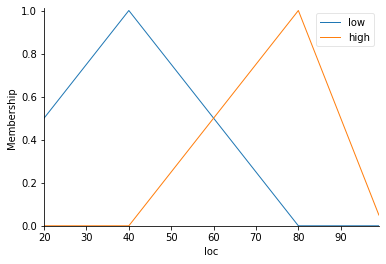

In [66]:
# mendaftarkan data untuk line of code

loc['low'] = fuzz.trimf(loc.universe, [0, 40, 80])
loc['high'] = fuzz.trimf(loc.universe, [40, 80, 100])

loc.view()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


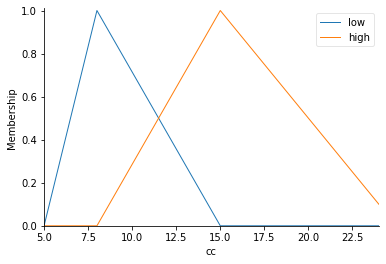

In [49]:
# mendaftarkan data untuk complexity code

cc['low'] = fuzz.trimf(cc.universe, [5, 8, 15])
cc['high'] = fuzz.trimf(cc.universe, [8, 15, 25])

cc.view()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


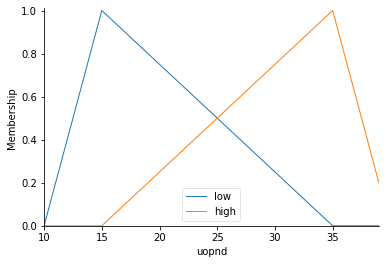

In [50]:
# mendaftarkan data untuk unik operand 


uopnd['low'] = fuzz.trimf(uopnd.universe, [10, 15, 35])
uopnd['high'] = fuzz.trimf(uopnd.universe, [15, 35, 40])

uopnd.view()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


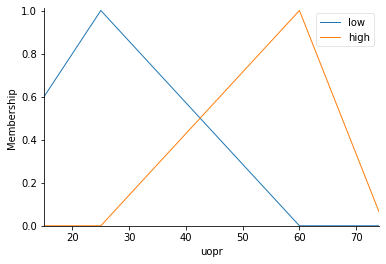

In [51]:
# mendaftarkan data untuk unik operator

uopr['low'] = fuzz.trimf(uopr.universe, [0, 25, 60])
uopr['high'] = fuzz.trimf(uopr.universe, [25, 60, 75])

uopr.view()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


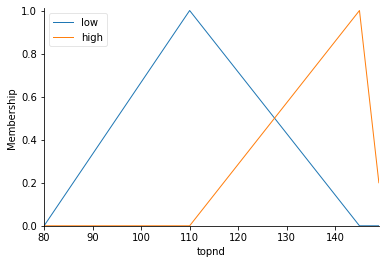

In [52]:
# mendaftarkan data untuk total operand

topnd['low'] = fuzz.trimf(topnd.universe, [80, 110, 145])
topnd['high'] = fuzz.trimf(topnd.universe, [110, 145, 150])

topnd.view()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


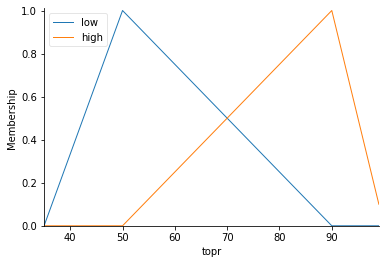

In [53]:
# mendaftarkan data untuk total operator

topr['low'] = fuzz.trimf(topr.universe, [35, 50, 90])
topr['high'] = fuzz.trimf(topr.universe, [50, 90, 100])

topr.view()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


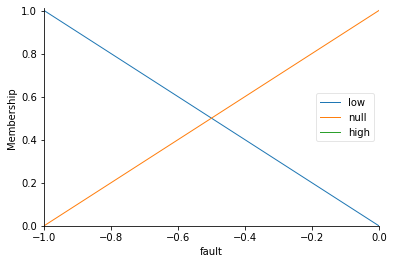

In [57]:
# mendaftarkan data untuk faultness

Names = ['low', 'null', 'high']

fault = NewConsequenceFuzzy_Triangular("fault" , -1 , 1 , 1 , Names)
fault.view()

In [58]:
# rule-base of the fuzzy logic system
# L 


rule = []
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['low'] & uopnd['low'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['low'] & uopnd['low'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['low'] & uopnd['low'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['high'] & uopnd['low'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['low'] & uopnd['high'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['low'] & uopnd['low'] & topnd['high'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['low'] & uopnd['low'] & topnd['low'] & topr['high'], fault['low']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['low'] & uopnd['low'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['high'] & uopnd['low'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['low'] & uopnd['high'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['low'] & uopnd['low'] & topnd['high'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['low'] & uopnd['low'] & topnd['low'] & topr['high'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['low'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['low'] & uopnd['high'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['low'] & uopnd['low'] & topnd['high'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['low'] & uopnd['low'] & topnd['low'] & topr['high'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['high'] & uopnd['low'] & topnd['high'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['high'] & uopnd['low'] & topnd['low'] & topr['high'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['low'] & uopnd['high'] & topnd['high'] & topr['low'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['low'] & uopnd['high'] & topnd['low'] & topr['high'], fault['low']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['low'] & uopnd['low'] & topnd['high'] & topr['high'], fault['low']))

rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['high'] & uopnd['low'] & topnd['low'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['low'] & uopnd['high'] & topnd['low'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['low'] & uopnd['low'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['low'] & uopnd['low'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['high'] & uopnd['low'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['low'] & uopnd['high'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['low'] & uopnd['high'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['low'] & uopnd['low'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['low'], fault['high'])) 
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['low'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['low'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['low'] & uopnd['high'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['low'] & uopnd['high'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['low'] & uopnd['low'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['high'] & uopnd['low'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['low'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high'])) 
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['high'] & uopnd['low'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['high'] & uopnd['low'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['low'] & uopnd['high'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['low'] & uopnd['high'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['low'] & uopnd['low'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['high'] & uopnd['low'] & topnd['high'] & topr['high'], fault['high'])) 
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['low'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['low'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['low'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['high'] & topr['low'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['low'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['high'] & uopnd['low'] & topnd['high'] & topr['high'], fault['high'])) 
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['low'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['low'] & uopr['high'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['low'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high']))
rule.append(ctrl.Rule(loc['high'] & cc['high'] & uopr['high'] & uopnd['high'] & topnd['high'] & topr['high'], fault['high']))

In [59]:
fault_ctrl = ctrl.ControlSystem(rule)

In [60]:
faultness = ctrl.ControlSystemSimulation(fault_ctrl)

In [63]:
# Threshold Value setiap inputan

faultness.input['loc'] = 65
faultness.input['cc'] = 10
faultness.input['uopnd'] = 25
faultness.input['uopr'] = 40
faultness.input['topnd'] = 125
faultness.input['topr'] = 70

# Crunch the numbers
faultness.compute()

hasil = (faultness.output['fault'] * -1)

In [67]:
print("hasil perhitungan JM1 : " , hasil)

hasil perhitungan JM1 :  0.6111111111111112


In [55]:
import os
import pandas as pd

In [56]:
#membaca data dari dataset

data = pd.read_csv('dataset.csv')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loc         10885 non-null  float64
 1   v(g)        10885 non-null  float64
 2   uniq_Op     10885 non-null  object 
 3   uniq_Opnd   10885 non-null  object 
 4   total_Op    10885 non-null  object 
 5   total_Opnd  10885 non-null  object 
dtypes: float64(2), object(4)
memory usage: 510.4+ KB


In [150]:
# Descriptive metrics input

data.describe(include='all')

,loc,v(g),uniq_Op,uniq_Opnd,total_Op,total_Opnd
count,10885.000000,10885.000000,10885,10885,10885,10885
unique,NaN,NaN,69,172,582,469
top,NaN,NaN,0,0,0,0
freq,NaN,NaN,1332,1368,1332,1368
mean,42.016178,6.348590,NaN,NaN,NaN,NaN
std,76.593332,13.019695,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,11.000000,2.000000,NaN,NaN,NaN,NaN
50%,23.000000,3.000000,NaN,NaN,NaN,NaN
75%,46.000000,7.000000,NaN,NaN,NaN,NaN


In [149]:
data.corr()

,loc,v(g)
loc,1.000000,0.817757
v(g),0.817757,1.000000
